In [1]:
import numpy as np
from sklearn import preprocessing

data = np.array([[3, -1.5, 2, -5.4], [0, 4, -0.3, 2.1], [1, 3.3, -1.9, -4.3]])

In [2]:
# 均值移除（ Mean removal） 标准化(standard deviation normalization)
data_standardized = preprocessing.scale(data)
print("\nMean =", data_standardized.mean(axis=0))
print("Std deviation =", data_standardized.std(axis=0))


Mean = [  5.55111512e-17  -1.11022302e-16  -7.40148683e-17  -7.40148683e-17]
Std deviation = [ 1.  1.  1.  1.]


In [3]:
# 范围缩放（ Scaling）
data_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
data_scaled = data_scaler.fit_transform(data)
print("\nMin max scaled data =", data_scaled)


Min max scaled data = [[ 1.          0.          1.          0.        ]
 [ 0.          1.          0.41025641  1.        ]
 [ 0.33333333  0.87272727  0.          0.14666667]]


In [4]:
# 归一化（ Normalization）
data_normalized = preprocessing.normalize(data, norm='l1')
print("\nL1 normalized data =", data_normalized)


L1 normalized data = [[ 0.25210084 -0.12605042  0.16806723 -0.45378151]
 [ 0.          0.625      -0.046875    0.328125  ]
 [ 0.0952381   0.31428571 -0.18095238 -0.40952381]]


In [5]:
# 二值化（ Binarization）
data_binarized = preprocessing.Binarizer(threshold=1.4).transform(data)
print("\nBinarized data =", data_binarized)


Binarized data = [[ 1.  0.  1.  0.]
 [ 0.  1.  0.  1.]
 [ 0.  1.  0.  0.]]


In [6]:
# 独热编码（One-Hot Encoding）
encoder = preprocessing.OneHotEncoder()
encoder.fit([[0, 2, 1, 12], [1, 3, 5, 3], [2, 3, 2, 12], [1, 2, 4, 3]])
encoded_vector = encoder.transform([[2, 3, 5, 3]]).toarray()
print("\nEncoded vector =", encoded_vector)


Encoded vector = [[ 0.  0.  1.  0.  1.  0.  0.  0.  1.  1.  0.]]


In [7]:
# 标记编码方式
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [8]:
input_classes = ['audi', 'ford', 'audi', 'toyota', 'ford', 'bmw']

In [9]:
label_encoder.fit(input_classes)

LabelEncoder()

In [10]:
print("\nClass mapping:")
for i, item in enumerate(label_encoder.classes_):
    print(item, '-->', i)


Class mapping:
audi --> 0
bmw --> 1
ford --> 2
toyota --> 3


In [11]:
labels = ['toyota', 'ford', 'audi']
encoded_labels = label_encoder.transform(labels)
print("\nLabels =", labels)
print("Encoded labels =", list(encoded_labels))


Labels = ['toyota', 'ford', 'audi']
Encoded labels = [3, 2, 0]


In [12]:
encoded_labels = [2, 1, 0, 3, 1]
decoded_labels = label_encoder.inverse_transform(encoded_labels)
print("\nEncoded labels =", encoded_labels)
print("Decoded labels =", list(decoded_labels))


Encoded labels = [2, 1, 0, 3, 1]
Decoded labels = ['ford', 'bmw', 'audi', 'toyota', 'bmw']


# 线性回归器
线性回归的要求实际输出和预测输出的残差平方和(sum of squares of differences)最小化。这种方法被称为普通最小二乘法。(Ordinary Least Squares, OLS)

In [13]:
import sys
import numpy as np

In [14]:
filename = 'data_singlevar.txt'
X = []
y = []
with open(filename, 'r') as f:
    for line in f.readlines():
        xt, yt = [float(i) for i in line.split(',')]
        X.append(xt)
        y.append(yt)

num_training = int(0.8 * len(X))
num_test = len(X) - num_training

# train data
X_train = np.array(X[:num_training]).reshape((num_training, 1))
y_train = np.array(y[:num_training])

# test data
X_test = np.array(X[num_training:]).reshape((num_test, 1))
y_test = np.array(y[num_training:])

In [15]:
from sklearn import linear_model

In [16]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

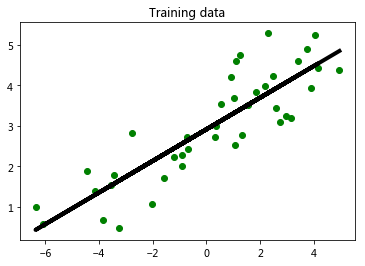

In [17]:
import matplotlib.pyplot as plt
y_train_pred = linear_regressor.predict(X_train)
plt.figure()
plt.scatter(X_train, y_train, color='green')
plt.plot(X_train, y_train_pred, color='black', linewidth=4)
plt.title('Training data')
plt.show()

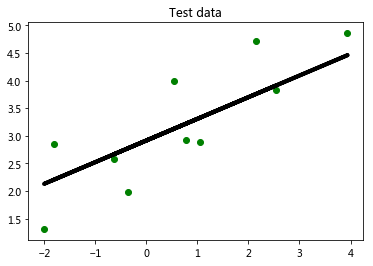

In [18]:
y_test_pred = linear_regressor.predict(X_test)
plt.scatter(X_test, y_test, color='green')
plt.plot(X_test, y_test_pred, color='black', linewidth=4)
plt.title("Test data")
plt.show()

# 误差
1. 平均绝对误差（ mean absolute error） ：这是给定数据集的所有数据点的绝对误差平均值。
2. 均方误差（ mean squared error） ：这是给定数据集的所有数据点的误差的平方的平均值。这是最流行的指标之一。
3. 中位数绝对误差（ median absolute error） ：这是给定数据集的所有数据点的误差的中位数。这个指标的主要优点是可以消除异常值（outlier）的干扰。测试数据集中的单个坏点不会影响整个误差指标，均值误差指标会受到异常点的影响。
4. 解释方差分（ explained variance score） ：这个分数用于衡量我们的模型对数据集波动的解释能力。如果得分1.0分，那么表明我们的模型是完美的。
5. R方得分（ R2 score） ：这个指标读作“R方”，是指确定性相关系数，用于衡量模型对未知样本预测的效果。最好的得分是1.0，值也可以是负数。

In [19]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2))
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred),2))
print("Explained variance score =", round(sm.explained_variance_score(y_test,y_test_pred), 2))
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

Mean absolute error = 0.54
Mean squared error = 0.38
Median absolute error = 0.54
Explained variance score = 0.68
R2 score = 0.68


# 岭回归
线性回归的主要问题是对异常值敏感。引入正则化项的系数作为阈值来消除异常值的影响。这个方法被称为岭回归。

In [20]:
filename = 'data_multivar.txt'
import numpy as np
data = np.genfromtxt('data_multivar.txt', delimiter=',')
X = data[:,:-1]
y = data[:,-1]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

/home/gabriel/anaconda3/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [21]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(X_train, y_train)
y_test_pred = linear_regressor.predict(X_test)
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2))
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred),2))
print("Explained variance score =", round(sm.explained_variance_score(y_test,y_test_pred), 2))
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

Mean absolute error = 3.6
Mean squared error = 20.85
Median absolute error = 3.01
Explained variance score = 0.86
R2 score = 0.86


In [22]:
# 当alpha趋于0时，岭回归器就是用普通最小二乘法的线性回归器。因此，如果你希望模型对异常值不那么敏感，就需要设置一个较大的alpha值。
ridge_regressor = linear_model.Ridge(alpha=0.1, fit_intercept=True, max_iter=10000)
ridge_regressor.fit(X_train, y_train)
y_test_pred_ridge = ridge_regressor.predict(X_test)
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred_ridge), 2))
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred_ridge), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred_ridge), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred_ridge), 2))
print("R2 score =", round(sm.r2_score(y_test, y_test_pred_ridge), 2))

Mean absolute error = 3.6
Mean squared error = 20.85
Median absolute error = 3.01
Explain variance score = 0.86
R2 score = 0.86


# 多项式回归

In [23]:
from sklearn.preprocessing import PolynomialFeatures
polynomial = PolynomialFeatures(degree=10)

In [24]:
X_train_transformed = polynomial.fit_transform(X_train)

In [25]:
datapoint = np.array([0.39,2.78,7.11], ndmin=2)
poly_datapoint = polynomial.fit_transform(datapoint)
poly_linear_model = linear_model.LinearRegression()
poly_linear_model.fit(X_train_transformed, y_train)
print("\nLinear regression:", linear_regressor.predict(datapoint) [0])
print("\nPolynomial regression:", poly_linear_model.predict(poly_datapoint)[0])


Linear regression: -10.2481524399

Polynomial regression: -8.09090123098


# 估算房屋价格

In [26]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import datasets
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
housing_data = datasets.load_boston()

In [28]:
X, y = shuffle(housing_data.data, housing_data.target, random_state=7)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8)

In [30]:
dt_regressor = DecisionTreeRegressor(max_depth=4)
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [31]:
ab_regressor = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=400, random_state=7)
ab_regressor.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=400,
         random_state=7)

In [32]:
y_pred_dt = dt_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred_dt)
evs = explained_variance_score(y_test, y_pred_dt)
print("\n#### Decision Tree performance ####")
print("Mean squared error =", round(mse, 2))
print("Explained variance score =", round(evs, 2))


#### Decision Tree performance ####
Mean squared error = 19.22
Explained variance score = 0.74


In [33]:
y_pred_ab = ab_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred_ab)
evs = explained_variance_score(y_test, y_pred_ab)
print("\n#### AdaBoost performance ####")
print("Mean squared error =", round(mse, 2))
print("Explained variance score =", round(evs, 2))


#### AdaBoost performance ####
Mean squared error = 10.96
Explained variance score = 0.85


In [34]:
def plot_feature_importances(feature_importances, title, feature_names):
    # 将重要性值标准化
    feature_importances = 100.0 * (feature_importances / max(feature_importances))
    # 将得分从高到低排序
    index_sorted = np.flipud(np.argsort(feature_importances))
    # 让X坐标轴上的标签居中显示
    pos = np.arange(index_sorted.shape[0]) + 0.5
    # 画条形图
    plt.figure()
    plt.bar(pos, feature_importances[index_sorted], align='center')
    plt.xticks(pos, feature_names[index_sorted])
    plt.ylabel('Relative Importance')
    plt.title(title)
    plt.show()

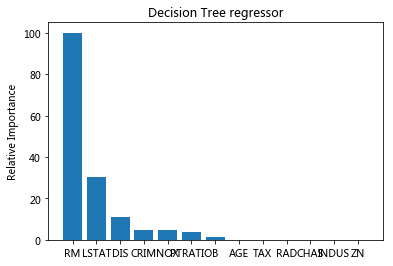

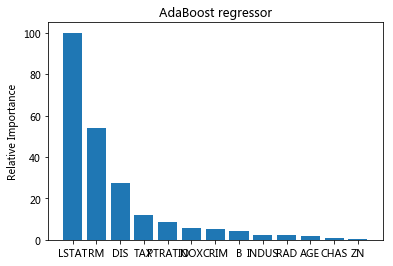

In [35]:
plot_feature_importances(dt_regressor.feature_importances_, 'Decision Tree regressor', housing_data.feature_names)
plot_feature_importances(ab_regressor.feature_importances_, 'AdaBoost regressor', housing_data.feature_names)

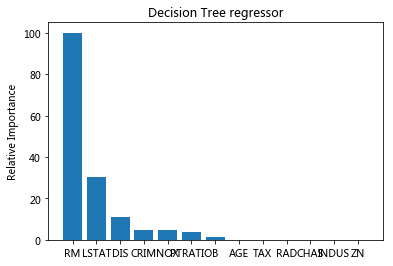

In [36]:
plot_feature_importances(dt_regressor.feature_importances_, 'Decision Tree regressor', housing_data.feature_names)


# 共享单车需求

In [37]:
import csv
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
from sklearn.utils import shuffle

In [38]:
df = pd.read_csv('bike_day.csv')
X = df.iloc[:, 2:-3].values
y = df.iloc[:, -1].values
feature_name = df.columns.values[2:-3]

In [39]:
X, y = shuffle(X, y, random_state=7)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8)

In [41]:
rf_regressor = RandomForestRegressor(n_estimators=1000, max_depth=10, min_samples_split=2)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [42]:
y_pred = rf_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
print("\n#### Random Forest regressor performance ####")
print("Mean squared error =", round(mse, 2))
print("Explained variance score =", round(evs, 2))


#### Random Forest regressor performance ####
Mean squared error = 525553.96
Explained variance score = 0.86


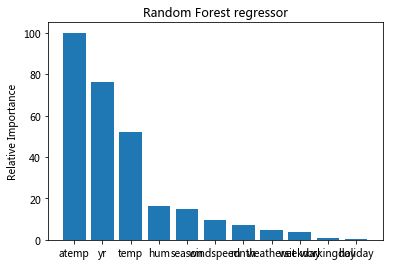

In [43]:
plot_feature_importances(rf_regressor.feature_importances_, 'Random Forest regressor', feature_name)

In [44]:
df = pd.read_csv('bike_hour.csv')
X = df.iloc[:, 2:14].values
y = df.iloc[:, -1].values
feature_name = df.columns.values[2:14]
X, y = shuffle(X, y, random_state=7)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8)

In [46]:
rf_regressor = RandomForestRegressor(n_estimators=1000, max_depth=10, min_samples_split=2)
rf_regressor.fit(X_train, y_train)
y_pred = rf_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
print("\n#### Random Forest regressor performance ####")
print("Mean squared error =", round(mse, 2))
print("Explained variance score =", round(evs, 2))


#### Random Forest regressor performance ####
Mean squared error = 2774.56
Explained variance score = 0.92


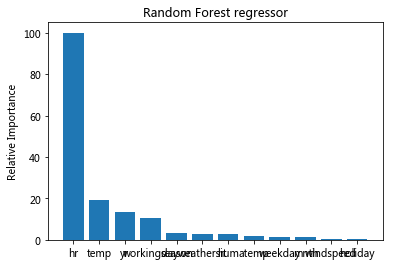

In [47]:
plot_feature_importances(rf_regressor.feature_importances_, 'Random Forest regressor', feature_name)